### Data Import and Cleaning

In this section, we load the datasets and merge the training and test sets with store information. We also handle missing values and remove outliers from the dataset, ensuring that the analysis isn't skewed by extreme values.

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')

# Merge datasets
train = pd.merge(train, store, how='left', on='Store')
test = pd.merge(test, store, how='left', on='Store')

# Check for missing values
print(train.isnull().sum())
print(test.isnull().sum())

# Fill missing values (example)
train['CompetitionDistance'].fillna(train['CompetitionDistance'].median(), inplace=True)
train.fillna(0, inplace=True)

# Removing outliers (example: sales)
Q1 = train['Sales'].quantile(0.25)
Q3 = train['Sales'].quantile(0.75)
IQR = Q3 - Q1
train = train[(train['Sales'] >= (Q1 - 1.5 * IQR)) & (train['Sales'] <= (Q3 + 1.5 * IQR))]


C:\Users\biement fanteye\AppData\Local\Temp\ipykernel_4384\1343636893.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment              

C:\Users\biement fanteye\AppData\Local\Temp\ipykernel_4384\1343636893.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['CompetitionDistance'].fillna(train['CompetitionDistance'].median(), inplace=True)


### Promotion Distribution in Training and Test Sets

We examine how promotions are distributed between the training and test sets. This will help us understand if promotional strategies are similar across both sets or if there's a discrepancy that could affect our model's performance.

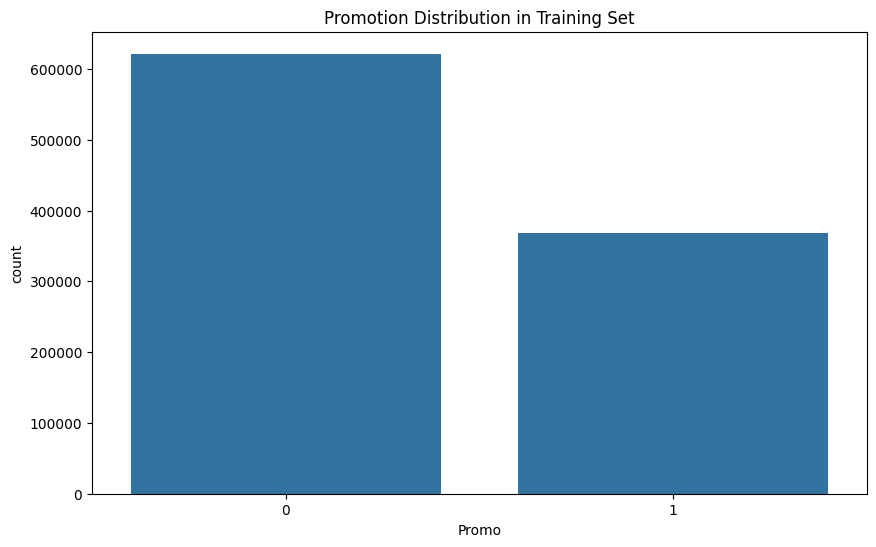

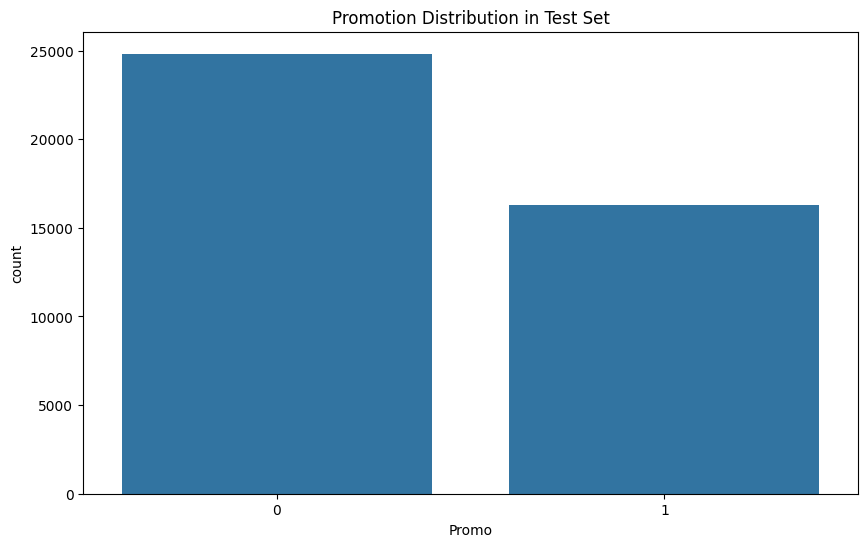

In [11]:
# Promotion distribution in training and test sets
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=train)
plt.title('Promotion Distribution in Training Set')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=test)
plt.title('Promotion Distribution in Test Set')
plt.show()

### Sales Behavior Before, During, and After Holidays

We analyze how sales fluctuate before, during, and after state holidays. This will provide insights into customer behavior during special occasions and help adjust forecasts for similar future events.

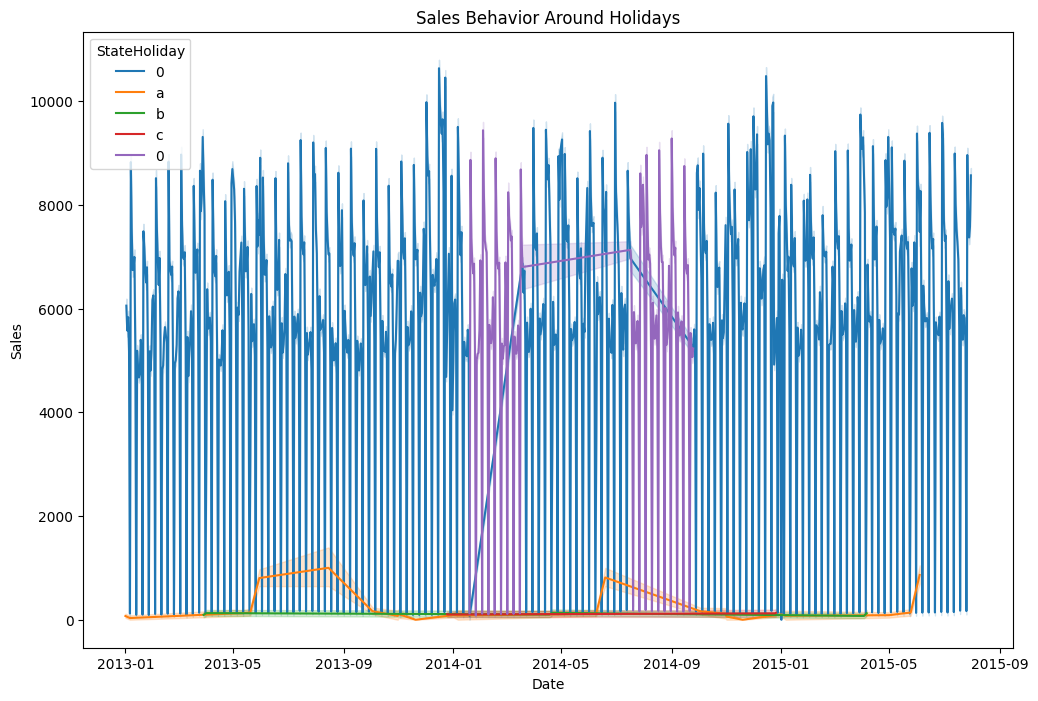

In [12]:
# Convert dates
train['Date'] = pd.to_datetime(train['Date'])
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day

# Visualize sales before, during, and after holidays
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Sales', hue='StateHoliday', data=train)
plt.title('Sales Behavior Around Holidays')
plt.show()

### Seasonal Purchase Behavior

We visualize sales trends across different months to identify any seasonality in customer purchasing behavior. This will help in understanding the effect of seasons, holidays, or events like Christmas and Easter on overall sales.

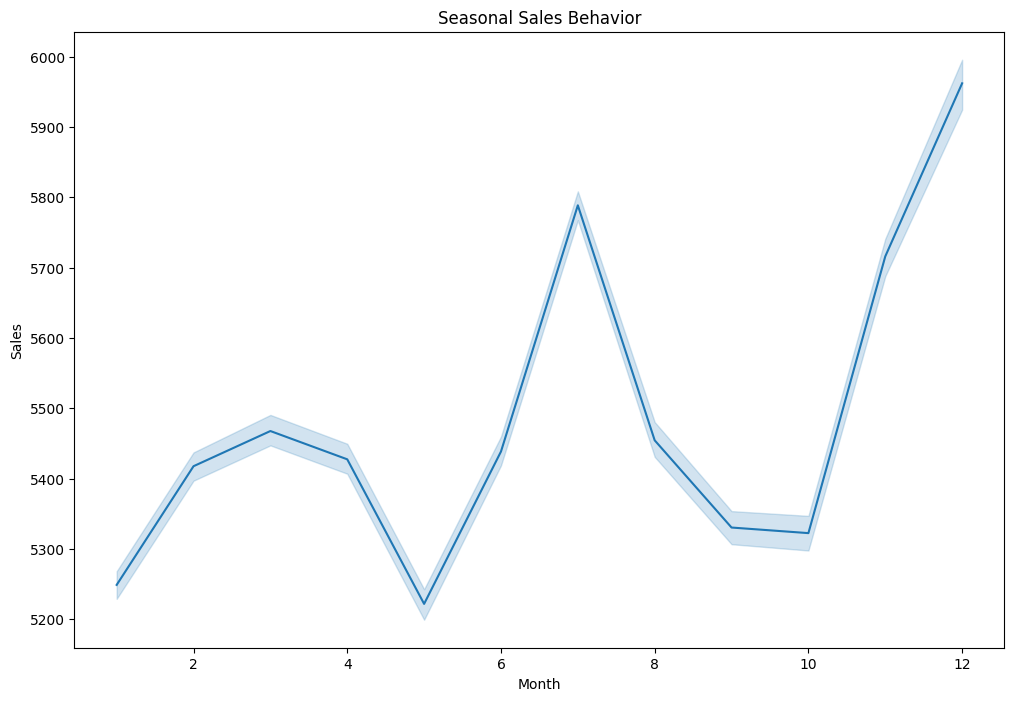

In [13]:
# Plot sales trends over months
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Sales', data=train)
plt.title('Seasonal Sales Behavior')
plt.show()

### Correlation Between Sales and Number of Customers

We check the correlation between sales and the number of customers. A high correlation indicates that customer numbers strongly influence store sales, which is important when planning marketing and operational strategies.

              Sales  Customers
Sales      1.000000   0.886841
Customers  0.886841   1.000000


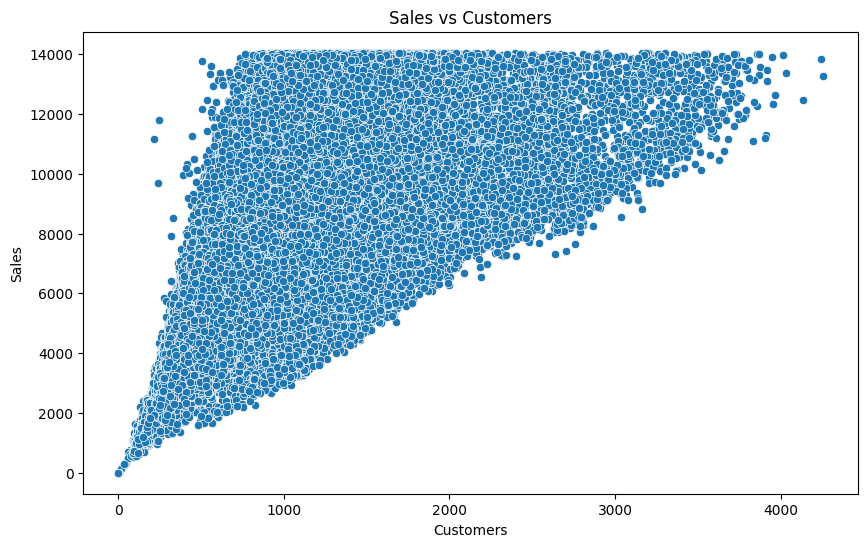

In [14]:
# Calculate correlation
corr = train[['Sales', 'Customers']].corr()
print(corr)

# Scatter plot for sales vs customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train)
plt.title('Sales vs Customers')
plt.show()

### Effect of Promotions on Sales and Customer Count

Here, we analyze the impact of promotions on both sales and customer counts. By comparing periods with and without promotions, we aim to assess if promotions successfully attract more customers and increase sales.

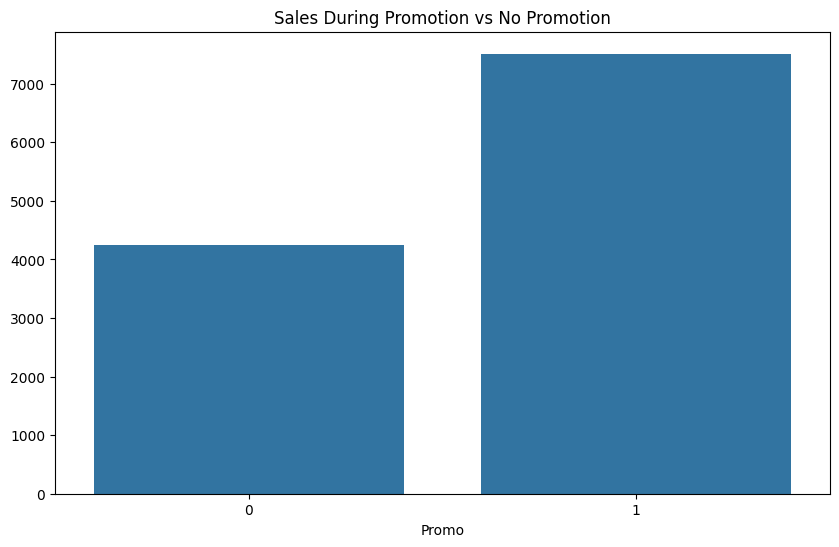

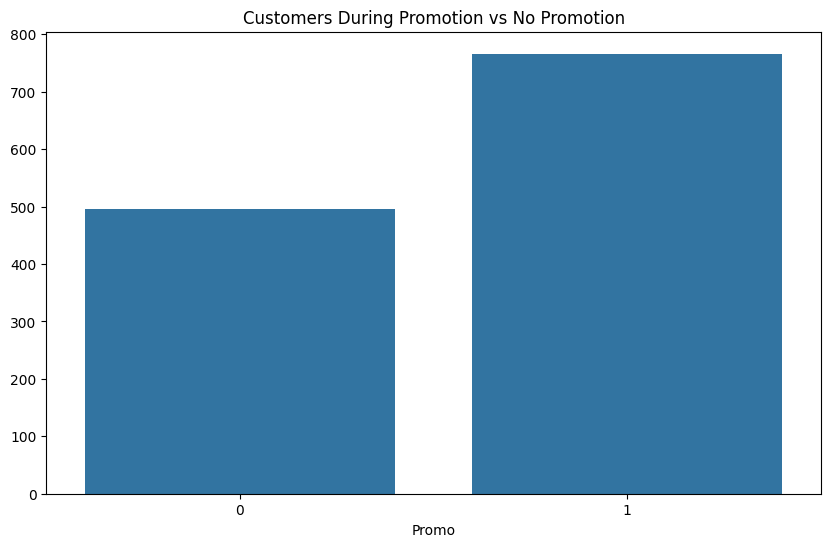

In [15]:
# Group by promotion and check sales
promo_sales = train.groupby('Promo')['Sales'].mean()
promo_customers = train.groupby('Promo')['Customers'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title('Sales During Promotion vs No Promotion')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=promo_customers.index, y=promo_customers.values)
plt.title('Customers During Promotion vs No Promotion')
plt.show()

### Assortment Type vs. Sales

We compare sales across different assortment types. This analysis will help us determine if the type of products offered in the stores significantly influences overall sales performance.

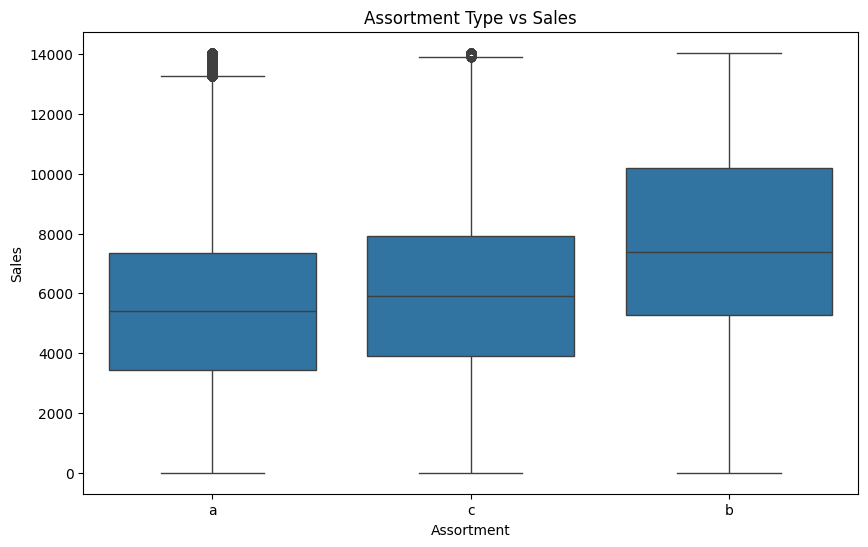

In [16]:
# Assortment type vs sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=train)
plt.title('Assortment Type vs Sales')
plt.show()

### Competitor Distance vs. Sales

We explore the effect of competitor distance on store sales. By analyzing the relationship between store sales and how close competitors are, we can assess the impact of competition on store performance.

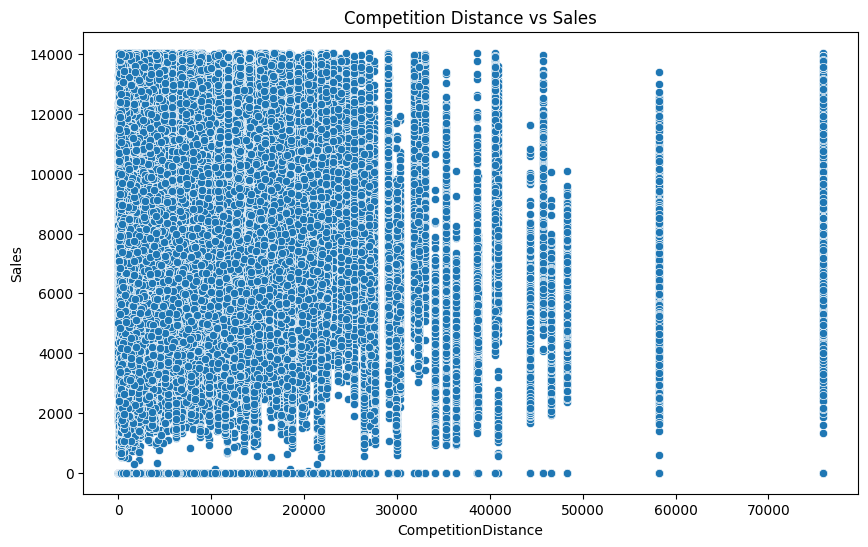

In [17]:
# Scatter plot for competitor distance vs sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=train)
plt.title('Competition Distance vs Sales')
plt.show()